In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [65]:
# 1. 데이터 로드 및 전처리
# 신용카드 데이터셋을 불러옵니다. 

df = pd.read_csv('/Users/hwang-gyuhan/Desktop/Collage/3-2/딥러닝응용/4주차/DSA_features.csv')
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [66]:
df.shape

(9120, 272)

In [67]:
# 결측치 홗인

df.isnull().values.any()

False

In [68]:
LABELS = df[df['activity'].isin(['sitting', 'jumping'])]

Text(0, 0.5, 'Frequency')

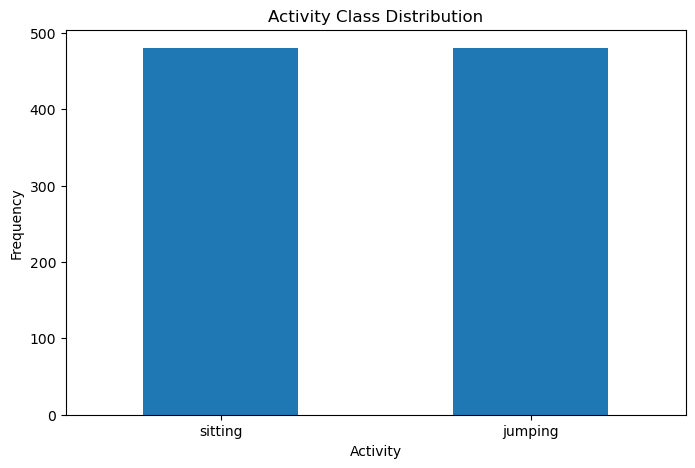

In [69]:
count_classes = pd.value_counts(LABELS['activity'], sort=True)
plt.figure(figsize=(8, 5))  
count_classes.plot(kind='bar', rot=0)
plt.title("Activity Class Distribution")
plt.xticks(rotation=0)
plt.xlabel("Activity")
plt.ylabel("Frequency")

In [70]:
sitting = df[df.activity == "sitting"]
jumping = df[df.activity == "jumping"]
sitting.shape

(480, 272)

In [71]:
jumping.shape

(480, 272)

In [72]:
RANDOM_SEED = 42

In [73]:
# "people" 열 삭제
LABELS = LABELS.drop(['people'], axis=1)

# X, y 정의
X = LABELS.drop(['activity'], axis=1)  # feature 데이터
y = LABELS['activity']                  # target 데이터

# 데이터 분할: training과 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. training을 다시 training/valid
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# 4. training/valid에서 jumping 데이터를 삭제 (sitting을 정상 데이터로 사용)
X_train = X_train[y_train == 'sitting']  # sitting만 남기기
y_train = y_train[y_train == 'sitting']   # y_train도 sitting에 맞게 업데이트

X_valid = X_valid[y_valid != 'jumping']  # jumping 데이터 제외
y_valid = y_valid[y_valid != 'jumping']   # y_valid도 jumping 데이터에 맞춰 업데이트

# 결과 출력
print("Unique values in training labels:", y_train.unique())
print("Unique values in validation labels:", y_valid.unique())
print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)
print("X_test shape:", X_test.shape)


Unique values in training labels: ['sitting']
Unique values in validation labels: ['sitting']
X_train shape: (307, 270)
X_valid shape: (77, 270)
X_test shape: (192, 270)


In [25]:
# 테스트 레이블을 남겨두는 이유는 나중에 정확도를 비교하기 위해서임

In [74]:
# 오토인코더 모델

input_dim = X_train.shape[1]
encoding_dim = 14  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [75]:
# 수치형 데이터로 변환 가능한 열만 선택
X_train_numeric = X_train.select_dtypes(include=[np.number])

# NaN 값 처리 (있다면 0으로 대체)
if np.any(np.isnan(X_train_numeric)):
    X_train_numeric = np.nan_to_num(X_train_numeric)

# 최종적으로 NumPy 배열로 변환하고 float32로 설정
X_train_numeric = np.array(X_train_numeric, dtype=np.float32)

# 모델 학습 재시도
history = autoencoder.fit(X_train_numeric, X_train_numeric, 
                          epochs=50, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_split=0.1)


Epoch 1/50
2/2 [==============================] - 3s 76ms/step - loss: 5.5449 - val_loss: 5.7143
Epoch 2/50
2/2 [==============================] - 0s 15ms/step - loss: 5.5391 - val_loss: 5.7080
Epoch 3/50
2/2 [==============================] - 0s 15ms/step - loss: 5.5319 - val_loss: 5.6997
Epoch 4/50
2/2 [==============================] - 0s 23ms/step - loss: 5.5231 - val_loss: 5.6896
Epoch 5/50
2/2 [==============================] - 0s 17ms/step - loss: 5.5124 - val_loss: 5.6773
Epoch 6/50
2/2 [==============================] - 0s 16ms/step - loss: 5.4995 - val_loss: 5.6628
Epoch 7/50
2/2 [==============================] - 0s 14ms/step - loss: 5.4844 - val_loss: 5.6458
Epoch 8/50
2/2 [==============================] - 0s 15ms/step - loss: 5.4674 - val_loss: 5.6270
Epoch 9/50
2/2 [==============================] - 0s 17ms/step - loss: 5.4484 - val_loss: 5.6062
Epoch 10/50
2/2 [==============================] - 0s 15ms/step - loss: 5.4273 - val_loss: 5.5833
Epoch 11/50
2/2 [============

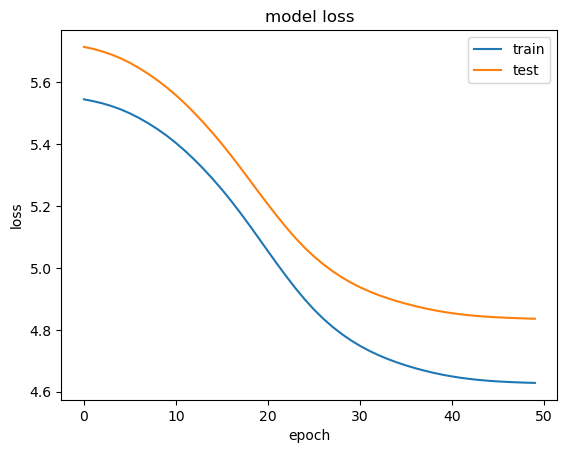

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [77]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

# true_class에 대한 통계와 reconstruction_error에 대한 통계 출력
error_summary = error_df.groupby('true_class').agg(['mean', 'std', 'min', 'max', 'count'])
print(error_summary)


6/6 [==============================] - 0s 508us/step
           reconstruction_error                                          
                           mean         std        min          max count
true_class                                                               
jumping              486.157441  402.321850  32.013017  2665.729263    96
sitting                4.730648    0.986117   4.395594    14.048525    96


In [78]:
error_df.head()

,reconstruction_error,true_class
439,4.839014,sitting
8508,207.029224,jumping
8350,432.234267,jumping
8620,527.981933,jumping
313,4.729974,sitting


In [81]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 10

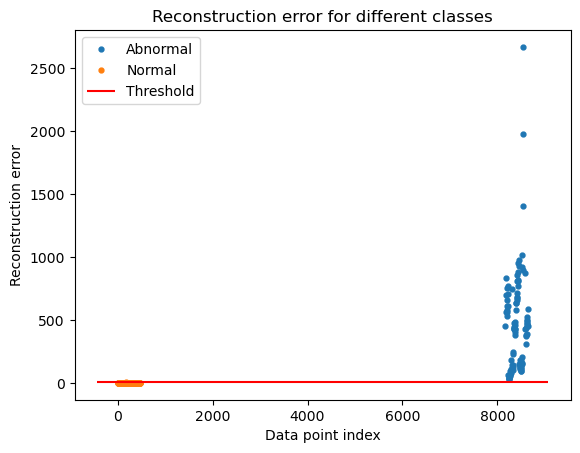

In [82]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label="Abnormal" if name == "jumping" else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();


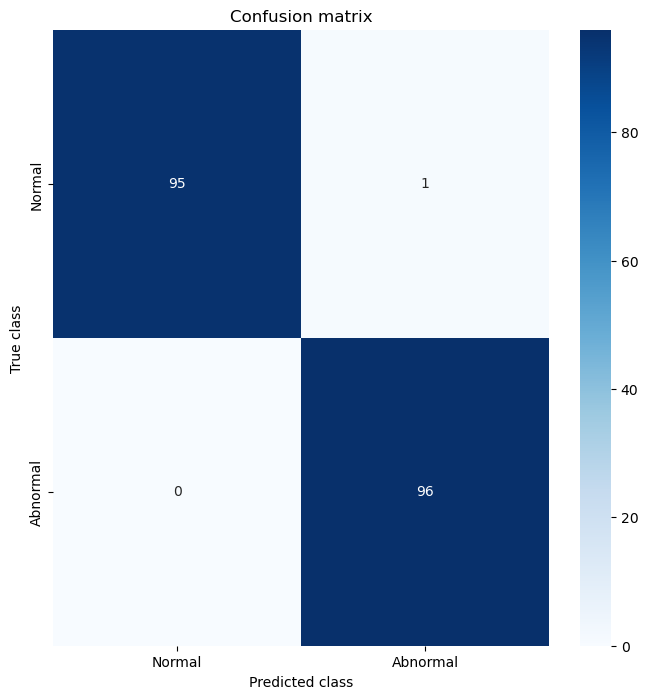

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        96
           1       0.99      1.00      0.99        96

    accuracy                           0.99       192
   macro avg       0.99      0.99      0.99       192
weighted avg       0.99      0.99      0.99       192



In [84]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# threshold에 따라 y_pred 생성
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]

# true_class가 문자열로 되어 있을 경우 정수형으로 변환
true_class_labels = {'sitting': 0, 'jumping': 1}  # 레이블을 정수형으로 매핑
error_df['true_class'] = error_df['true_class'].map(true_class_labels)

# 혼동 행렬 계산
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues',
             xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# 분류 리포트 출력
print(classification_report(error_df.true_class, y_pred))
